<a href="https://colab.research.google.com/github/0joazz/artificial-intelligence_studies/blob/master/Aprendizado%20de%20M%C3%A1quina%20-%20UFPB/Projeto_Final_(UFPB)_Aprendizagem_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aprendizado de Máquina
##### Projeto final exigido para aprovação na cadeira de Aprendizado de Máquina (UFPB)



In [ ]:
# Loads R environment
%load_ext rpy2.ipython

# import files from local storage
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


Saving fetal_health.csv to fetal_health.csv


## STATISTICS

In [ ]:
%%R

library('tidyverse')
library('dplyr')

data = read.csv("fetal_health.csv")
data
# first 6 observations
head(data)

# structure of the dataset
str(data)

# min, 1st and 3rd quartiles, median, mean, max: for all numeric variables
summary(data)


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

R[write to console]: ✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



'data.frame':	2126 obs. of  22 variables:
 $ baseline.value                                        : num  120 132 133 134 132 134 134 122 122 122 ...
 $ accelerations                                         : num  0 0.006 0.003 0.003 0.007 0.001 0.001 0 0 0 ...
 $ fetal_movement                                        : num  0 0 0 0 0 0 0 0 0 0 ...
 $ uterine_contractions                                  : num  0 0.006 0.008 0.008 0.008 0.01 0.013 0 0.002 0.003 ...
 $ light_decelerations                                   : num  0 0.003 0.003 0.003 0 0.009 0.008 0 0 0 ...
 $ severe_decelerations                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ prolongued_decelerations                              : num  0 0 0 0 0 0.002 0.003 0 0 0 ...
 $ abnormal_short_term_variability                       : num  73 17 16 16 16 26 29 83 84 86 ...
 $ mean_value_of_short_term_variability                  : num  0.5 2.1 2.1 2.4 2.4 5.9 6.3 0.5 0.5 0.3 ...
 $ percentage_of_time_with_abnorm

In [ ]:
%%R

# target variable
target = data$fetal_health

# columns
columns = colnames(data)[-length(data)]

In [ ]:
%%R

# descriptive statistics for each column
statistics <- data.frame(matrix(nrow=12, ncol=23))
statistics[1,1] = "STATISTIC"
statistics[2:12, 1] = c("min","max","mean","mode","1stQuartile",
                        "median","3rdQuartile","range","interQuartilRange",
                        "stdDeviation","variance")
for(i in 2:22) {
  column = columns[i-1]
  statistics[1,i] = column
  
  occurrencies <- table(data[[column]])
  sort(occurrencies, decreasing=TRUE)
  mode = occurrencies[1]

  statistics[2,i] = min(data[[column]])
  statistics[3,i] = max(data[[column]])
  statistics[4,i] = mean(data[[column]])
  statistics[5,i] = mode
  statistics[6,i] = quantile(data[[column]], 0.25)
  statistics[7,i] = median(data[[column]])
  statistics[8,i] = quantile(data[[column]], 0.75)
  statistics[9,i] = max(data[[column]]) - min(data[[column]])
  statistics[10,i] = IQR(data[[column]])
  statistics[11,i] = sd(data[[column]])
  statistics[12,i] = var(data[[column]])
}

In [ ]:
%%R

# correlation matrix (Pearson)
pearson_corr_matrix = data.frame(round(cor(data), digits=4))
# correlation matrix (Spearman)
spearman_corr_matrix = data.frame(round(cor(data, method='spearman'), digits=4))

## VISUALIZATIONS

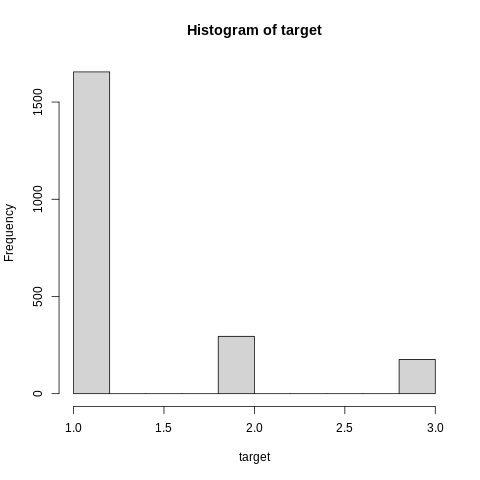

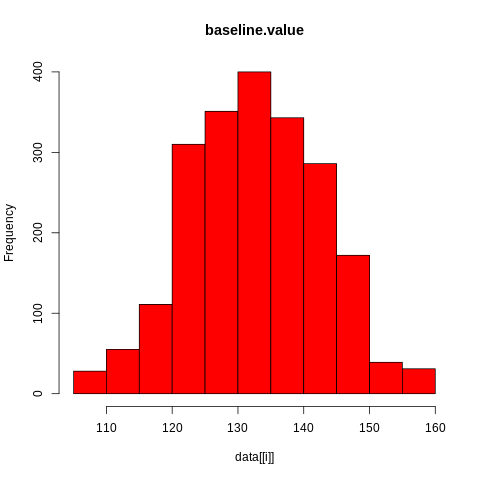

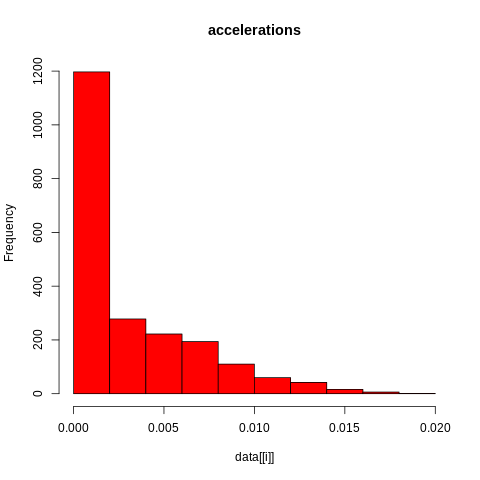

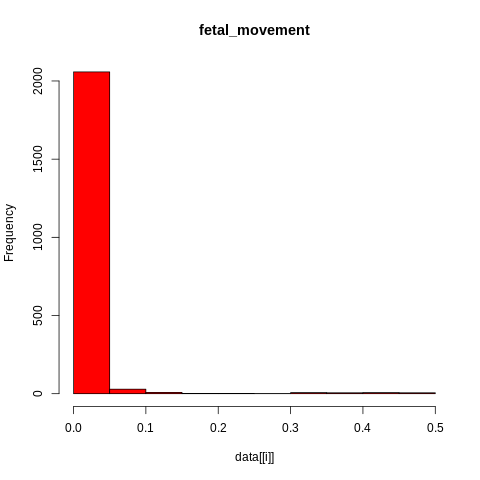

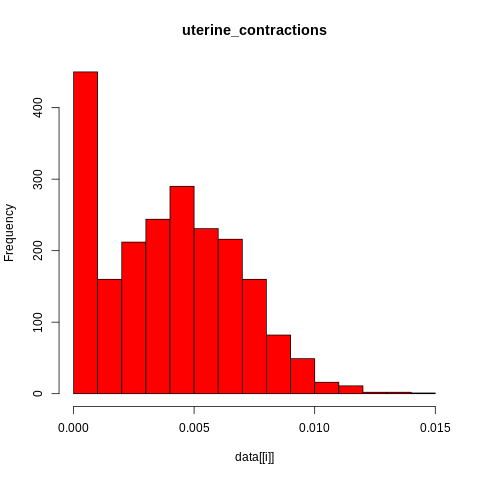

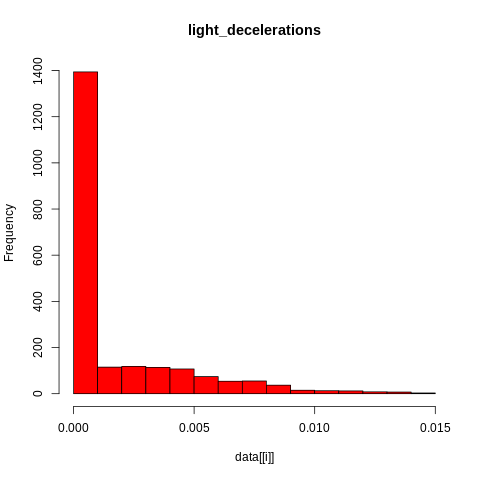

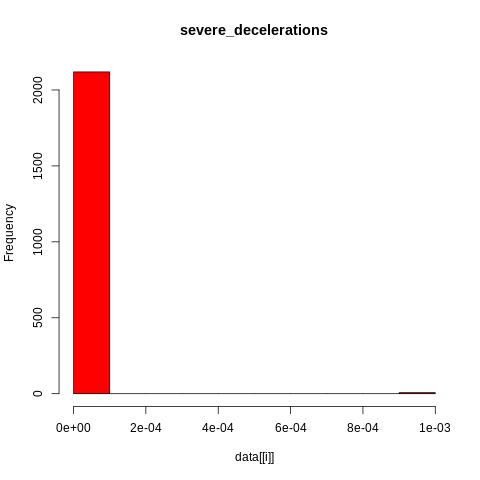

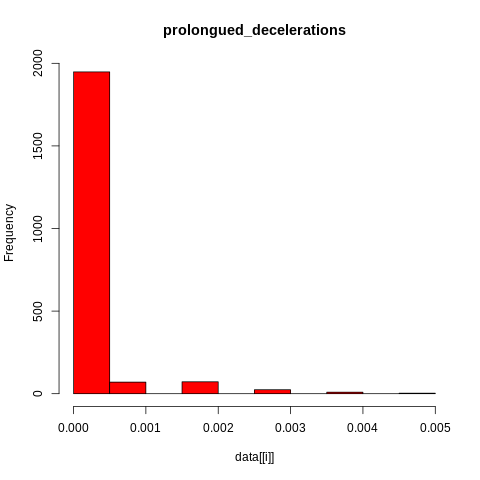

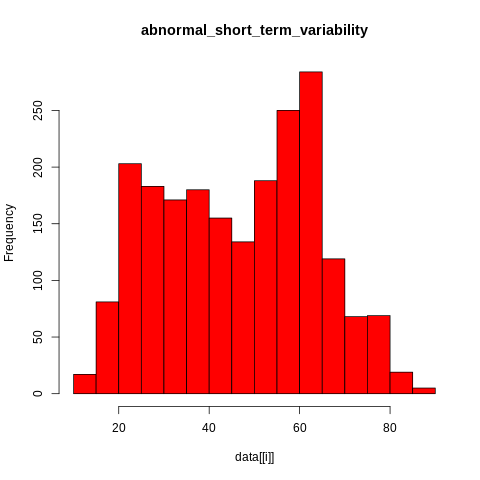

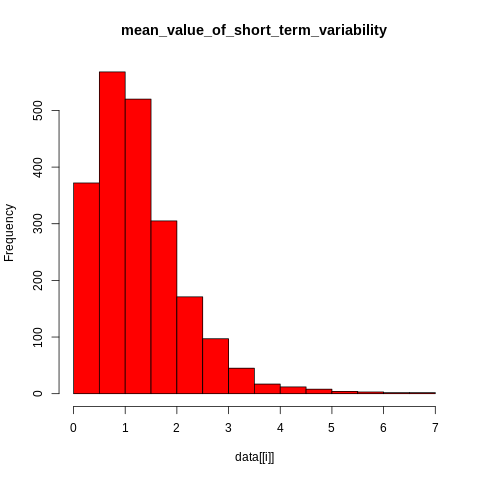

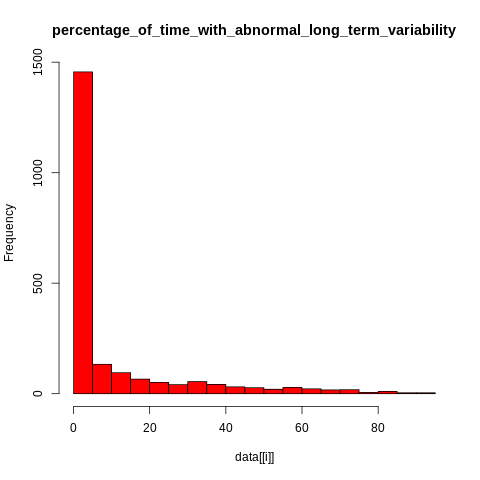

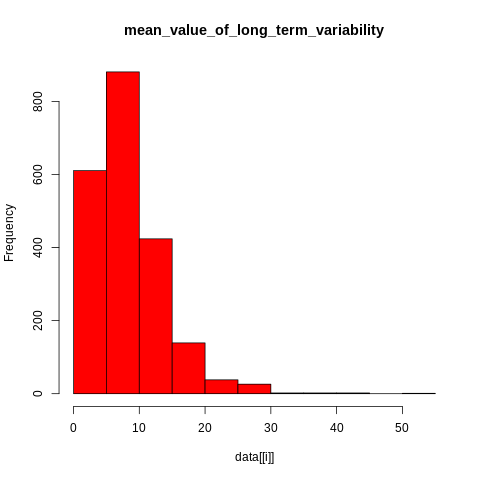

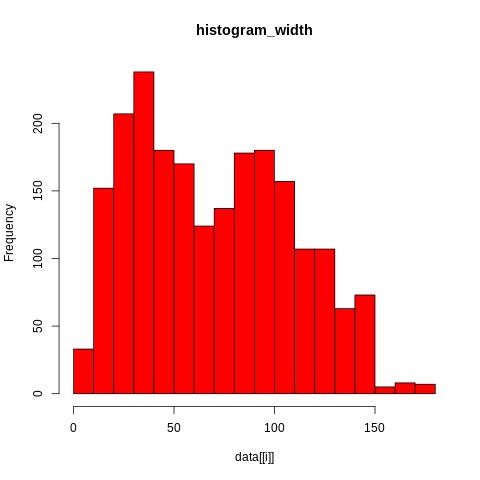

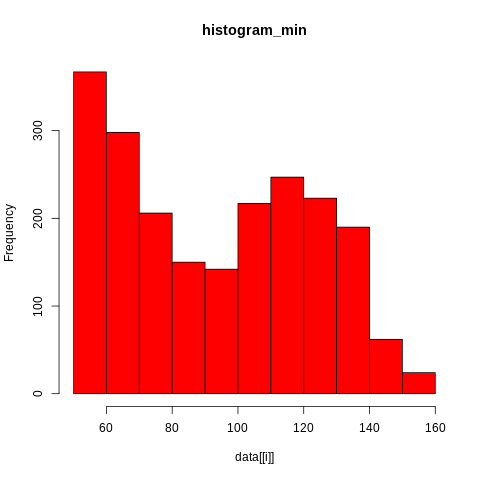

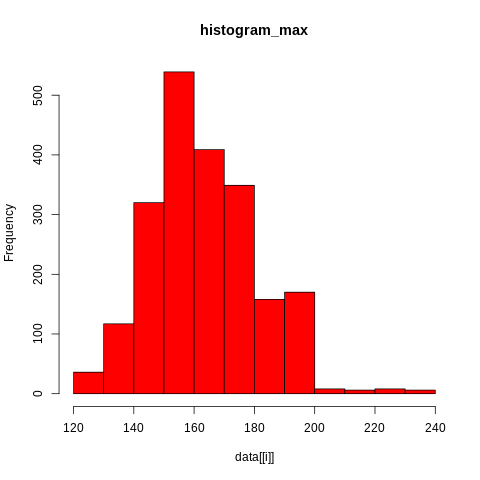

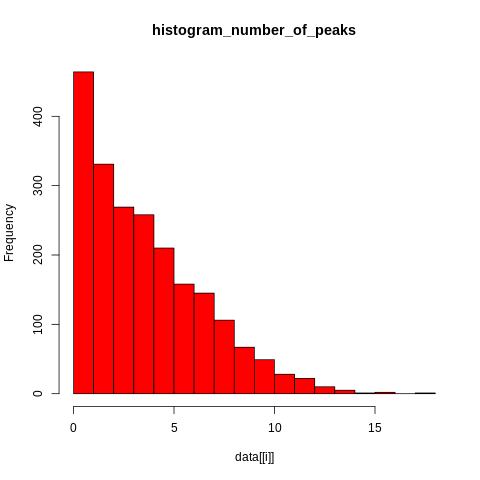

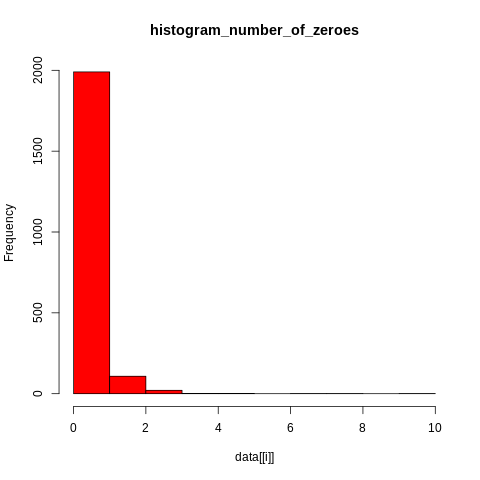

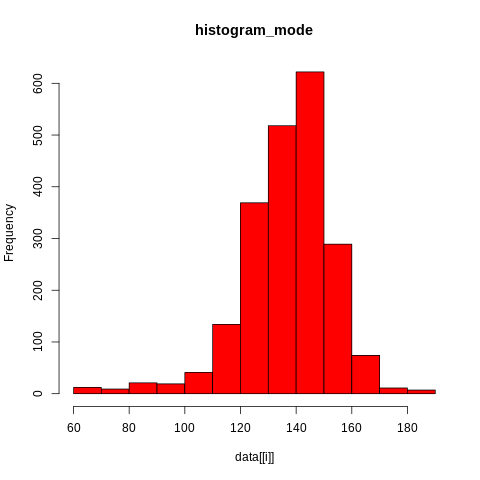

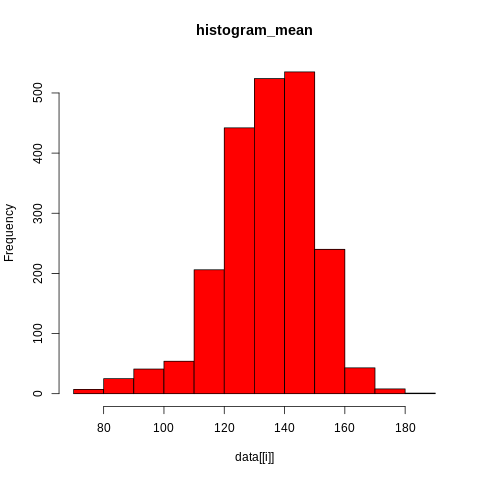

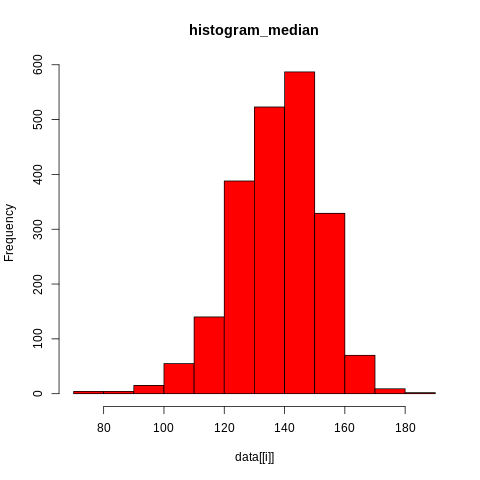

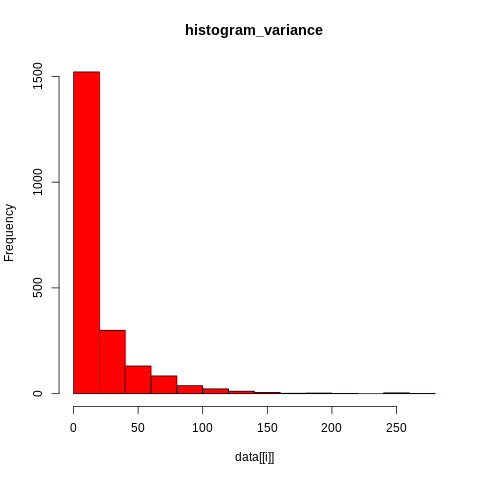

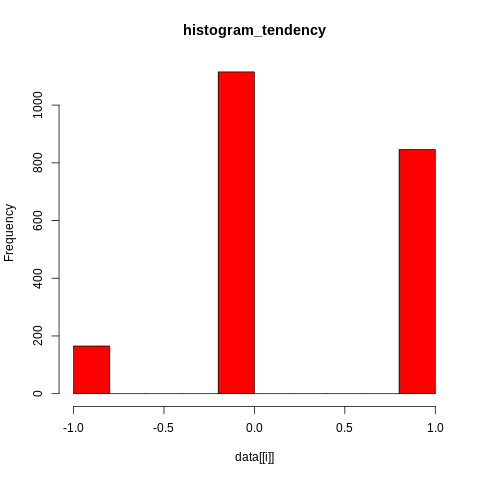

In [ ]:
%%R

# histogram of the target variable
hist(target)

# histograms for each feature
for(i in 1:21) {
    hist(data[[i]], main=columns[i], col="red")
}



## PREPROCESSING


In [ ]:
%%R

# missing values
for(i in 1:22) { if (is.na(data[[i]])) {print('Missing value!'); print(i)}}
# as we can see, there are no missing values in this dataset

# all the data types are numeric
#str(data)
# fetal_health is categoric but ordinal

[1] "Respective lengths: "
[1] 1655
[1] 295
[1] 176
[1] "Proportion between classes 1 and 2: "
[1] 5.610169
[1] "Proportion between classes 1 and 3: "
[1] 9.403409
[1] "Respective lengths after oversampling: "
[1] 1655
[1] 1655
[1] 1655
[1] "Proportion between classes 1 and 2: "
[1] 1
[1] "Proportion between classes 1 and 3: "
[1] 1


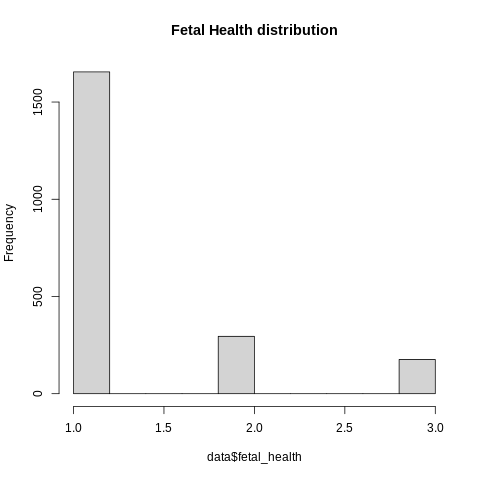

In [ ]:
%%R
# oversampling

# the data here is imbalanced
hist(data$fetal_health, main="Fetal Health distribution")

class_1 = data[which(data$fetal_health == 1), ]
class_2 = data[which(data$fetal_health == 2), ]
class_3 = data[which(data$fetal_health == 3), ]

print('Respective lengths: ')
print(length(class_1[[1]]))
print(length(class_2[[1]]))
print(length(class_3[[1]]))
print('Proportion between classes 1 and 2: ')
print(length(class_1[,1])/length(class_2[,1]))
print('Proportion between classes 1 and 3: ')
print(length(class_1[,1])/length(class_3[,1]))

# replicating small classes
balanced_c2 = class_2[rep(1:nrow(class_2), 5), ]
balanced_c2 = rbind(balanced_c2, sample_n(class_2, 180))
# c2: 1475(add 180)
balanced_c3 = class_3[rep(1:nrow(class_3), 9), ]
balanced_c3 = rbind(balanced_c3, sample_n(class_3, 71))
# c3: 1584(add 71)

# concatenating the balanced classes
balanced_data = rbind(balanced_c2, balanced_c3)
new_dataset = rbind(class_1, balanced_data)

# randomizing the whole dataset
set.seed(17012001)
new_dataset = sample(new_dataset)

print('Respective lengths after oversampling: ')
print(length(class_1[[1]]))
print(length(balanced_c2[[1]]))
print(length(balanced_c3[[1]]))
print('Proportion between classes 1 and 2: ')
print(length(class_1[,1])/length(balanced_c2[, 1]))
print('Proportion between classes 1 and 3: ')
print(length(class_1[,1])/length(balanced_c3[, 1]))

In [ ]:
%%R

# standardization
standardized = scale(new_dataset)

# normalization
minmax_normalization <- function(x) {
    (x - min(x))/(max(x) - min(x))
}

normalized = as.data.frame(lapply(new_dataset, minmax_normalization))

# ordering the balanced dataset's columns
DATASET = normalized[colnames(data)]
head(DATASET)

  baseline.value accelerations fetal_movement uterine_contractions
1      0.4814815     0.3157895      0.0000000            0.4000000
2      0.5000000     0.1578947      0.0000000            0.5333333
3      0.5185185     0.1578947      0.0000000            0.5333333
4      0.4814815     0.3684211      0.0000000            0.5333333
5      0.4629630     0.2631579      0.1496881            0.5333333
6      0.4629630     0.4736842      0.4615385            0.4000000
  light_decelerations severe_decelerations prolongued_decelerations
1           0.2000000                    0                        0
2           0.2000000                    0                        0
3           0.2000000                    0                        0
4           0.0000000                    0                        0
5           0.2000000                    0                        0
6           0.1333333                    0                        0
  abnormal_short_term_variability mean_value_of_short_t

## REGRESSION MODELS

## Regressão Linear 

A regressão linear não regularizada mostra-se um modelo versátil, de fácil implementação e resultados moderadamente satisfatórios. Sendo um modelo simples por natureza, seu funcionamento é baseado na premissa de uma relação linear (ou aproximadamente linear) entre as variáveis de entrada e a variável de saída, assumindo a forma de uma combinação linear entre as entradas e um conjunto de coeficientes reais que determinam a importância de cada variável proporcionalmente à magnitude dos respectivos coeficientes.

Na construção deste modelo, as variáveis de entrada originais passaram por uma seleção, onde só foram escolhidas as variáveis cujos coeficientes de correlação linear com a variável de saída (fetal_health) fossem maiores ou iguais a um limite determinado pelo desenvolvedor. Desta forma, obteve-se um modelo razoavelmente satisfatório, cujas estatísticas de desempenho podem ser analisadas na saída da célula a seguir.

In [ ]:
%%R
# linear regression

target = DATASET$fetal_health

# predictors with greatest correlation values to the target
most_important_predictors = c()
for(i in 1:21) {
    if(abs(pearson_corr_matrix$fetal_health[i]) > 0.2)
    {
        most_important_predictors = c(most_important_predictors, colnames(DATASET)[i])
        
    }
}
predictors = DATASET[most_important_predictors]

D1 = predictors
D1 $ fetal_health = target

# build linear model
model = lm(fetal_health ~., data = D1)

# model performance
print(summary(model))
sprintf("Confidence Interval: %s", confint(model))



Call:
lm(formula = fetal_health ~ ., data = D1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84765 -0.15071  0.00965  0.14601  0.71795 

Coefficients:
                                                       Estimate Std. Error
(Intercept)                                             0.20739    0.02421
accelerations                                          -0.53144    0.02612
uterine_contractions                                   -0.07989    0.01974
prolongued_decelerations                                0.68558    0.02459
abnormal_short_term_variability                         0.61342    0.01952
percentage_of_time_with_abnormal_long_term_variability  0.40472    0.01716
mean_value_of_long_term_variability                    -0.02769    0.04296
histogram_mode                                         -0.05867    0.05403
histogram_mean                                         -0.40536    0.06757
histogram_median                                        0.08889    0.08256
histogr

## Perceptron Multicamadas

Redes neurais por sua natureza quase sempre apresentam performance superior à maioria dos modelos de aprendizagem de máquina, justamente por sua inspiração biológica e pela maneira como são construídas. Redes neurais assumem neurônios artificiais, que, no caso da arquitetura multicamadas (Multilayer Perceptron) consiste em sucessivas camadas de neurônios artificiais, onde cada neurônio é simulado por uma combinação linear de todas as saídas da camada anterior, acionando uma função de ativação que determinará a saída final do neurônio em questão. 

Um perceptron multicamadas consiste de conjuntos de neurônios, cada neurônio possui uma conexão com todos os neurônios da camada anterior, onde a cada conexão é atribuído um peso que define a importância de uma dada entrada em um neurônio. A rede neural precisa ser inicializada com pesos aleatórios, mas estes pesos precisam ser alterados iterativamente por meio do processo de treinamento.

Um algoritmo de treinamento de redes neurais artificiais muito popular é conhecido como Backpropagation, referência ao processo de propagar o erro na direção contrária do fluxo de informações da rede neural, isto é, cada saída é derivada com relação à entrada para que se possa determinar os pesos que melhor diminuem uma função de erro. Em suma, o algoritmo de treinamento busca a configuração de pesos que minimiza o erro nas respostas de uma rede neural artificial. Na célula abaixo é possível observar, no gráfico gerado, como o desempenho do modelo melhora com o passar do tempo, indicando as nuances nos valores de erro da rede neural. 

In [ ]:
%%R
#install.packages("RSNNS")
library("RSNNS")
# neural network (multilayer perceptron)

# training and validation splits
split = splitForTrainingAndTest(DATASET[,1:21], DATASET$fetal_health, ratio=0.2)

# build a multilayer perceptron
model = mlp(split$inputsTrain, split$targetsTrain, size=7, learnFuncParams=c(0.15),
            maxit=200, inputsTest=split$inputsTest, targetsTest=split$targetsTest)

# evaluate the artificial neural network
summary(model)
plotIterativeError(model)

R[write to console]: Error in library("RSNNS") : there is no package called ‘RSNNS’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library

R[write to console]: In addition: 
R[write to console]: There were 22 warnings (use warnings() to see them)
R[write to console]: 




Error in library("RSNNS") : there is no package called ‘RSNNS’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library
